In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Week 2 - Portfolio Optimization

- Mean-Variance Framework
- Finding the optimal combination of risk and return between a bundle of assets
- Mean return is linear, follows distributive property, but risk depends on the correlation of the assets
- If they're correlated, then we can take an "average", if they're uncorrelated the average risk is lower


## Efficient Frontier

<AxesSubplot:>

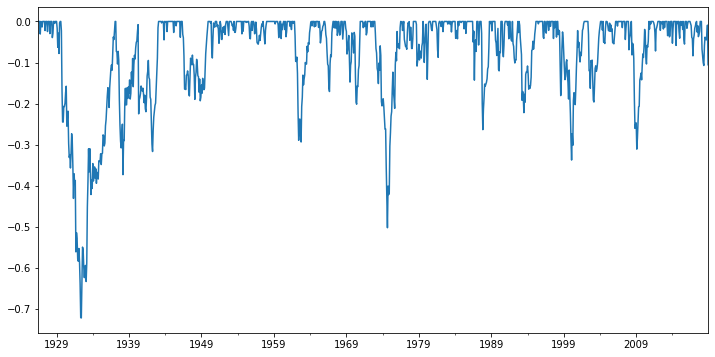

In [13]:
ind = erk.get_ind_returns()
ind.shape

# computing drawdowns for Food industry
erk.drawdown(ind['Food'])['drawdown'].plot.line(figsize=(12, 6))

In [15]:
erk.var_gaussian(ind[['Food', 'Smoke', 'Coal', 'Beer', 'Fin']], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [18]:
erk.var_gaussian(ind, modified=True).sort_values().tail()


Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [17]:
erk.var_gaussian(ind, modified=True).sort_values().head()


Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<AxesSubplot:title={'center':'Industry Sharpe-Ratio'}>

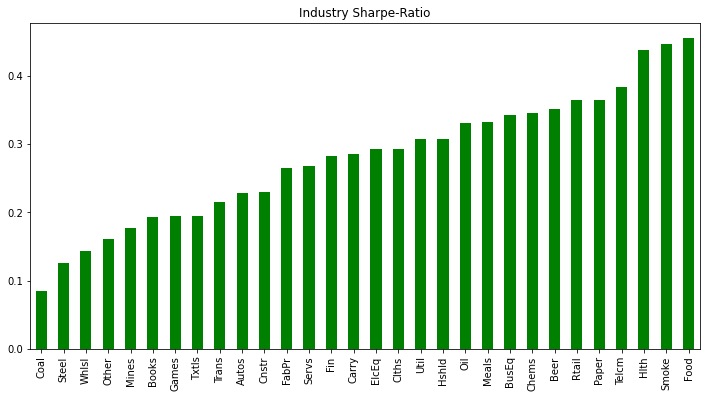

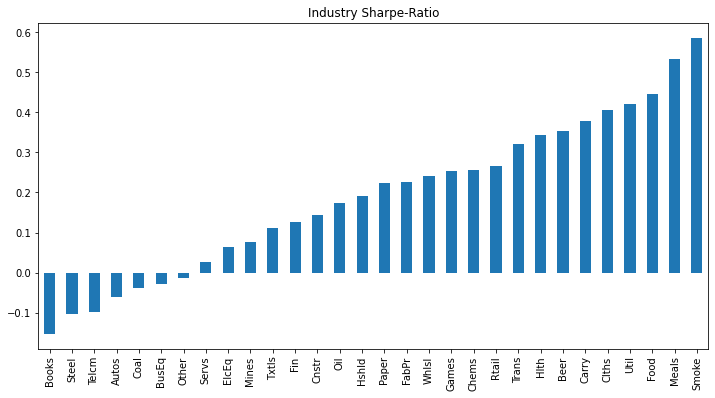

In [28]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar(figsize=(12, 6))

# now we can calculate the Sharpe ratio of the assets in the dataset
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(figsize=(12, 6), title='Industry Sharpe-Ratio',
                                                       color='green')
plt.figure()
erk.sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(figsize=(12, 6), title='Industry Sharpe-Ratio')

Now we can calculate the efficient frontier. First as an in-sample exercise because we don't have the expected returns

In [32]:
# expected returns, in this case they're the real returns
er = erk.annualize_rets(ind["1995":"2000"], periods_per_year=12)

# covariance matrix of the assets
cov = ind["1995":"2000"].cov()

# square, symmetric, the diagonal is the variance of the assets.
cov


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668
